In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("goldstock.csv")
df

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1
...,...,...,...,...,...,...,...
2506,2528,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
2507,2529,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2508,2530,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2509,2531,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8


In [ ]:
df=df.drop('Unnamed: 0',axis=1)
df

,Date,Close,Volume,Open,High,Low
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1
...,...,...,...,...,...,...
2506,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
2507,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2508,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2509,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8


In [ ]:
df.isnull().sum()

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

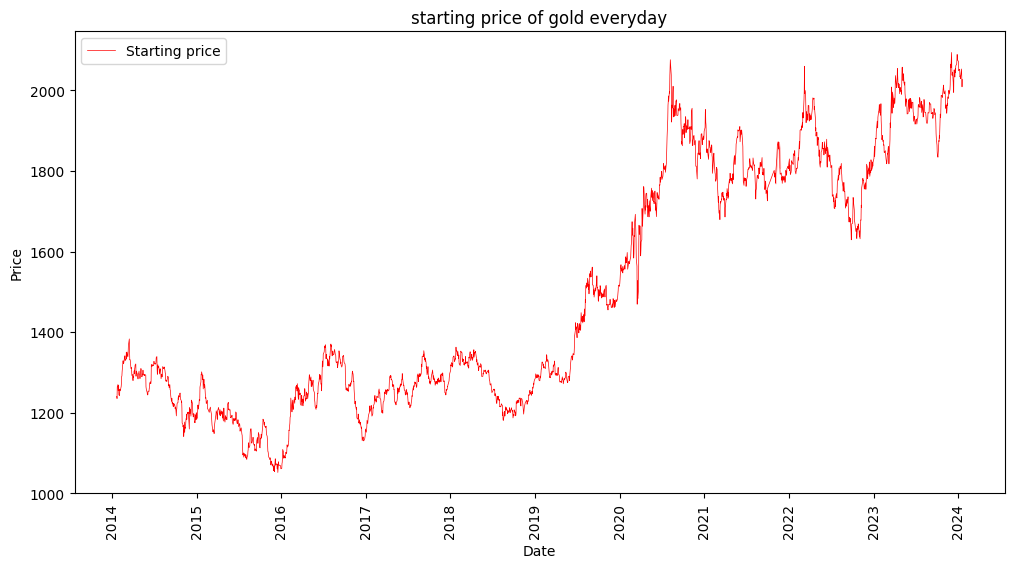

In [ ]:
plt.figure(figsize=(12,6))
plt.title('starting price of gold everyday')
sns.lineplot(x=df['Date'], y=df.Open,label='Starting price',linewidth=0.5,color='red')
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Price")
plt.show()

In [ ]:
df['diff']=df['High']-df['Low']

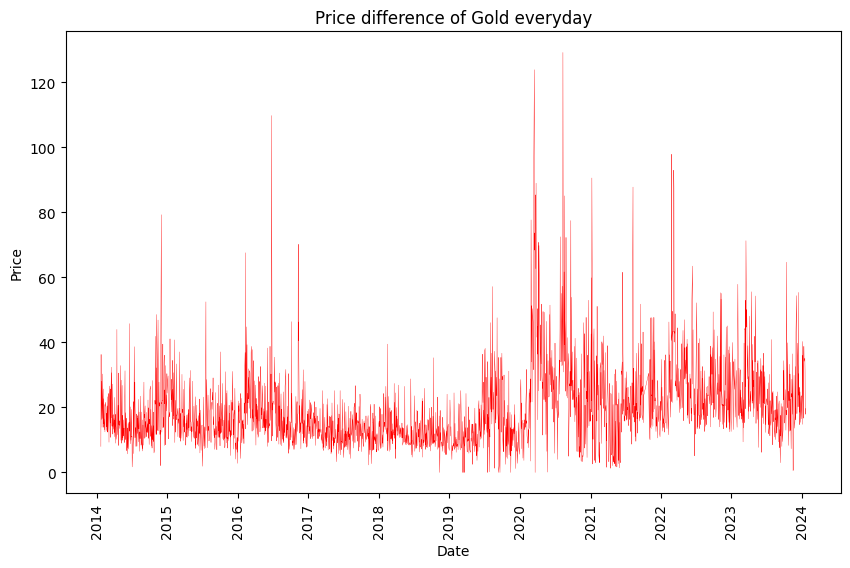

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Price difference of Gold everyday')
sns.lineplot(x=df['Date'],y=df['diff'],linewidth=0.25,color='red')
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Price")
plt.show()

Text(0.5, 1.0, 'Gold Trading volume distribution')

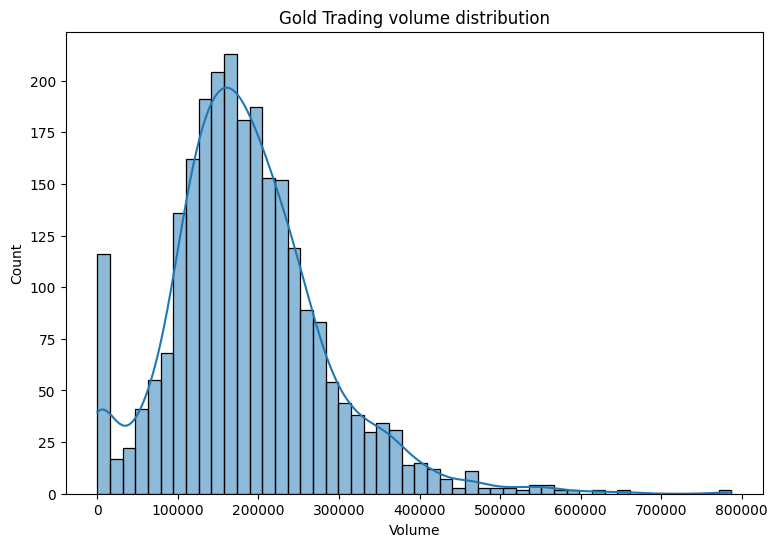

In [ ]:
plt.figure(figsize=(9,6))
sns.histplot(df.Volume,kde=True)
plt.title("Gold Trading volume distribution")

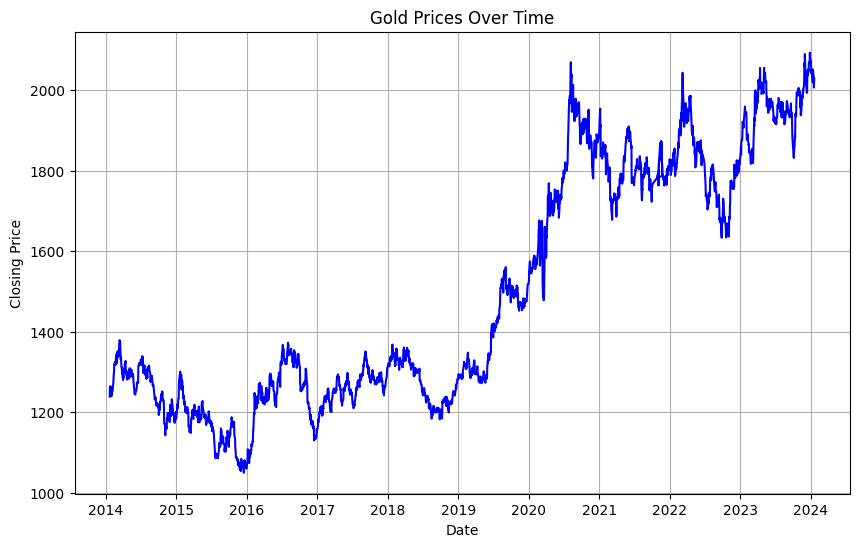

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], color='blue')
plt.title('Gold Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


In [ ]:
df_close = df[['Date','Close']]
df_close

,Date,Close
0,2024-01-19,2029.3
1,2024-01-18,2021.6
2,2024-01-17,2006.5
3,2024-01-16,2030.2
4,2024-01-12,2051.6
...,...,...
2506,2014-01-28,1250.5
2507,2014-01-27,1263.5
2508,2014-01-24,1264.5
2509,2014-01-23,1262.5


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

train, test = train_test_split(df['Close'], test_size=0.2, shuffle=False)




In [ ]:

model = ARIMA(train, order=(5,1,0))
fit_model = model.fit()



In [ ]:
predictions = fit_model.forecast(steps=len(test))


In [ ]:
mae = mean_absolute_error(test, predictions)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 115.7057836606266


In [ ]:
from prophet import Prophet
model_close = Prophet()
df_close.rename(columns={'Date':'ds','Close':'y'},inplace=True)
model_close.fit(df_close)

<ipython-input-18-2451016d46c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close.rename(columns={'Date':'ds','Close':'y'},inplace=True)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpso5c1kuh/hvd7o3qk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpso5c1kuh/irrqxfwm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23157', 'data', 'file=/tmp/tmpso5c1kuh/hvd7o3qk.json', 'init=/tmp/tmpso5c1kuh/irrqxfwm.json', 'output', 'file=/tmp/tmpso5c1kuh/prophet_modelcl2qctgr/prophet_model-20240311064453.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:44:

In [ ]:
X = df[['Volume', 'Open', 'High', 'Low','diff']]
y = df['Close']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

35.896651683910285

In [ ]:
ddf=pd.DataFrame({'actual':y_test,'predict':y_pred})
ddf

,actual,predict
983,1600.0,1594.436673
835,1962.1,1963.989530
1828,1268.6,1272.320993
1220,1291.1,1293.614011
65,1934.3,1928.097903
...,...,...
505,1798.8,1795.756517
2387,1309.4,1313.398520
1392,1254.5,1253.280584
85,1953.4,1952.206643


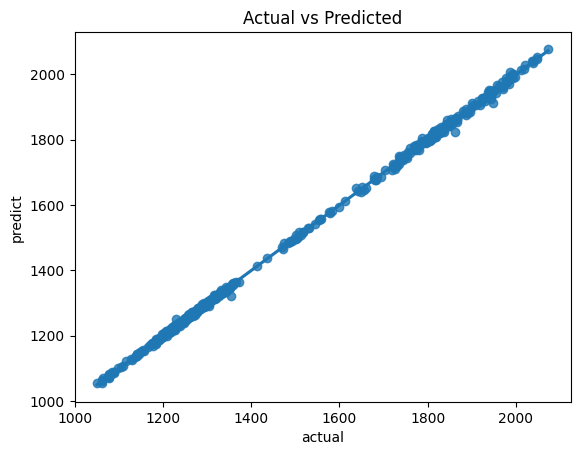

In [ ]:
sns.regplot(x='actual', y='predict', data=ddf)
plt.title('Actual vs Predicted')
plt.show()

<ipython-input-32-6d124f1f7bf6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'][50:] = np.where(df['SMA_50'][50:] > df['SMA_200'][50:], 1, 0)


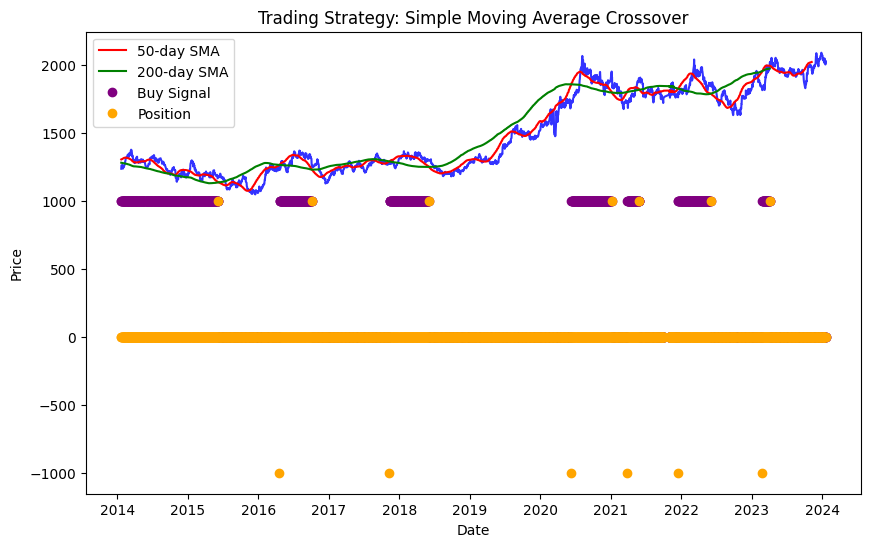

In [ ]:
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()
df['Signal'] = 0
df['Signal'][50:] = np.where(df['SMA_50'][50:] > df['SMA_200'][50:], 1, 0)
df['Position'] = df['Signal'].diff()

# Plot trading signals
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], color='blue', alpha=0.8)
plt.plot(df['Date'], df['SMA_50'], color='red', label='50-day SMA')
plt.plot(df['Date'], df['SMA_200'], color='green', label='200-day SMA')
plt.plot(df['Date'], df['Signal']*1000, marker='o', linestyle='', color='purple', label='Buy Signal')
plt.plot(df['Date'], df['Position']*1000, marker='o', linestyle='', color='orange', label='Position')
plt.title('Trading Strategy: Simple Moving Average Crossover')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
news_headlines = ["Gold prices surge on economic uncertainty",
                  "Federal Reserve announces interest rate hike",
                  "Trade tensions escalate between US and China"]

sentiment_scores = []
for headline in news_headlines:
    sentiment_score = analyzer.polarity_scores(headline)
    sentiment_scores.append(sentiment_score)

print(sentiment_scores)


[{'neg': 0.324, 'neu': 0.676, 'pos': 0.0, 'compound': -0.34}, {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.4588}, {'neg': 0.31, 'neu': 0.69, 'pos': 0.0, 'compound': -0.4019}]


In [ ]:
import requests
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def get_news_articles(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    articles = soup.find_all('article')
    return articles

def analyze_sentiment(text):
    sentiment_score = sia.polarity_scores(text)['compound']
    return sentiment_score

def main():
    url = "https://www.example.com/finance/gold"

    articles = get_news_articles(url)

    for article in articles:
        title = article.find('h2').get_text()
        content = article.find('p').get_text()
        sentiment_score = analyze_sentiment(content)
        print("Title:", title)
        print("Content:", content)
        print("Sentiment Score:", sentiment_score)
        print()

if __name__ == "__main__":
    main()


In [ ]:
mean_price = df['Close'].mean()
std_dev = df['Close'].std()
skewness = df['Close'].skew()
kurtosis = df['Close'].kurtosis()

print("Mean Price:", mean_price)
print("Standard Deviation:", std_dev)
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)



Mean Price: 1498.72608522501
Standard Deviation: 298.8248107145269
Skewness: 0.3959399842687736
Kurtosis: -1.4394840022131468


In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix)


             Close    Volume      Open      High       Low      diff  \
Close     1.000000  0.022835  0.998994  0.999524  0.999576  0.384937   
Volume    0.022835  1.000000  0.027012  0.030871  0.018274  0.309706   
Open      0.998994  0.027012  1.000000  0.999459  0.999386  0.387858   
High      0.999524  0.030871  0.999459  1.000000  0.999251  0.404045   
Low       0.999576  0.018274  0.999386  0.999251  1.000000  0.368345   
diff      0.384937  0.309706  0.387858  0.404045  0.368345  1.000000   
SMA_50    0.984943  0.024264  0.984177  0.984791  0.984509  0.387053   
SMA_200   0.943883  0.046951  0.943268  0.943657  0.943730  0.381548   
Signal   -0.029210 -0.059392 -0.030345 -0.028705 -0.030868  0.040034   
Position  0.007409 -0.012708  0.006074  0.006672  0.006953 -0.004053   

            SMA_50   SMA_200    Signal  Position  
Close     0.984943  0.943883 -0.029210  0.007409  
Volume    0.024264  0.046951 -0.059392 -0.012708  
Open      0.984177  0.943268 -0.030345  0.006074  
Hig

<ipython-input-41-becb50483c66>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()
